# Figures and Tables for the essay

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import itertools
from bn3d.analysis import get_results_df, get_thresholds_df, export_summary_tables
from bn3d.plots._hashing_bound import plot_hashing_bound
from bn3d.plots._repthresh import plot_repthresh
from bn3d.plots._threshold import (
    plot_deformedxps, plot_deformedzps, plot_crossing_collapse,
    plot_combined_threshold_vs_bias, plot_combined_triangles,
    plot_threshold_fss, plot_data_collapse, plot_crossing_example,
    plot_collapse_example
)

In [2]:
plots_dir = '../../essay/images/'
table_dir = '../../essay/tables/'
job_list = ['deformed_rays', 'undeformed_rays']

In [3]:
results_inf_bias_df = get_results_df(['deformed_inf_bias'], alt_output_dir='../../results/deformed_x_only')

wall_time = 10:48:06.992649
n_trials =  0


In [4]:
results_df = get_results_df(job_list)
thresholds_df, trunc_results_df, params_bs_list = get_thresholds_df(results_df)

wall_time = 8 days, 5:17:18.176930
n_trials =  3000
wall_time = 6 days, 19:53:54.042229
n_trials =  401


In [5]:
def pdf(name):
    return os.path.join(plots_dir, name + '.pdf')

In [6]:
def_map = {True: 'deformed', False: 'undeformed'}

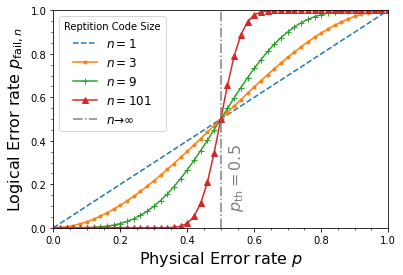

In [7]:
plot_repthresh(plt, pdf=pdf('repthresh'))

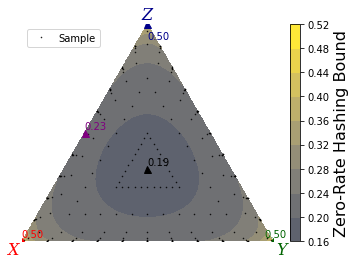

In [8]:
plot_hashing_bound(plt, pdf=pdf('hashingbound'))

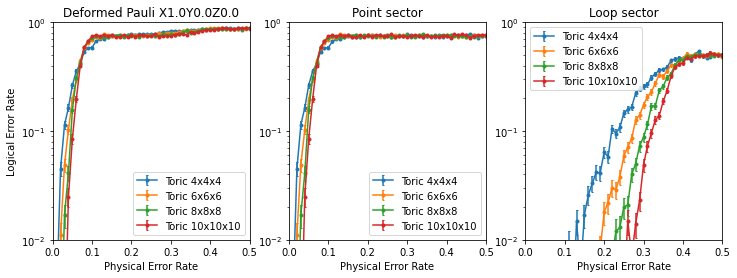

In [9]:
plot_deformedxps(plt, results_inf_bias_df, pdf=pdf('deformedxps'))

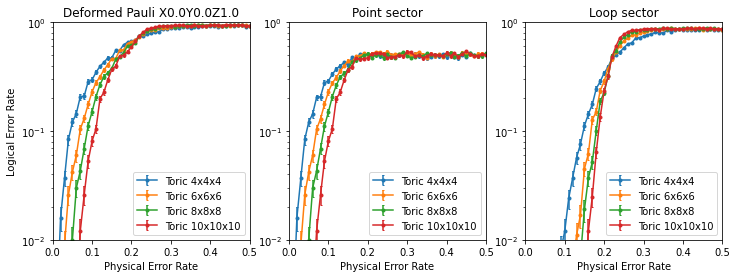

In [10]:
plot_deformedzps(plt, results_inf_bias_df, pdf=pdf('deformedzps'))

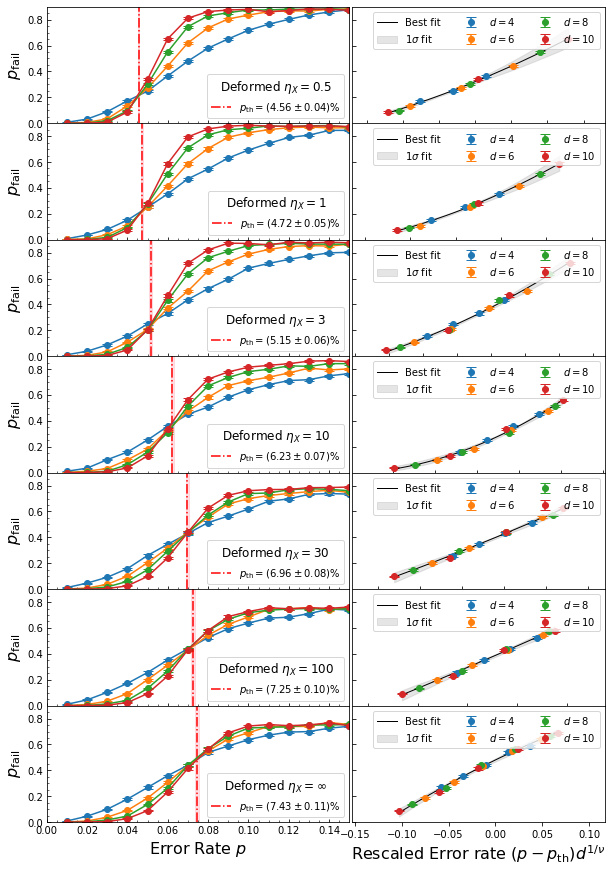

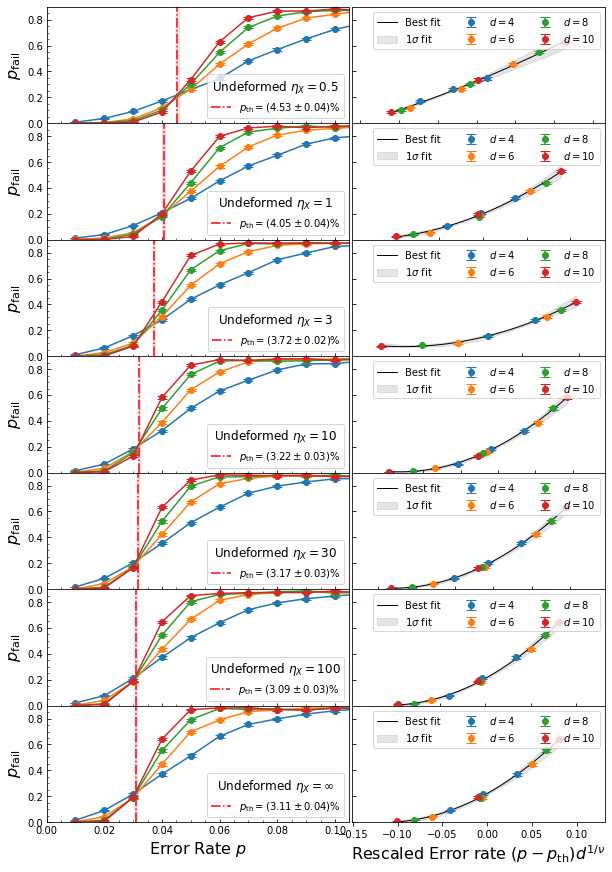

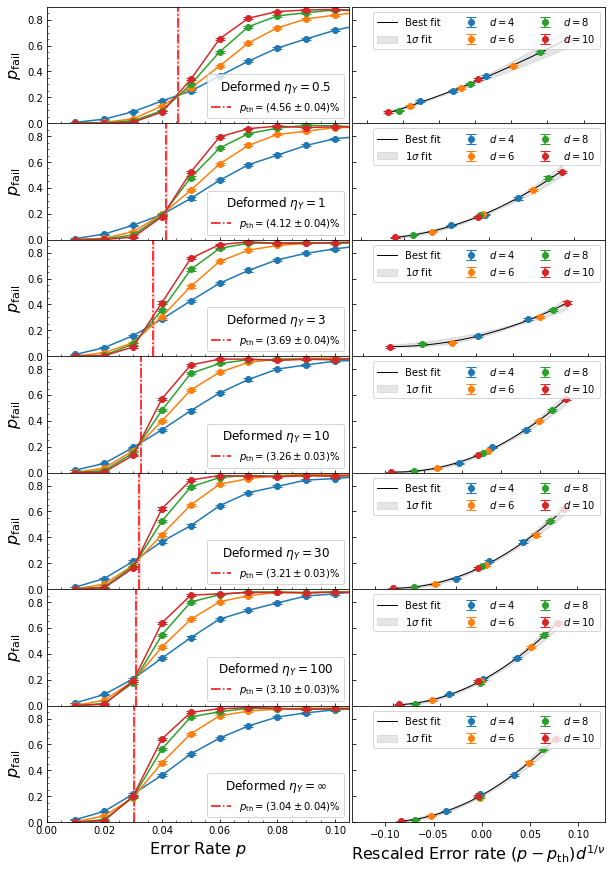

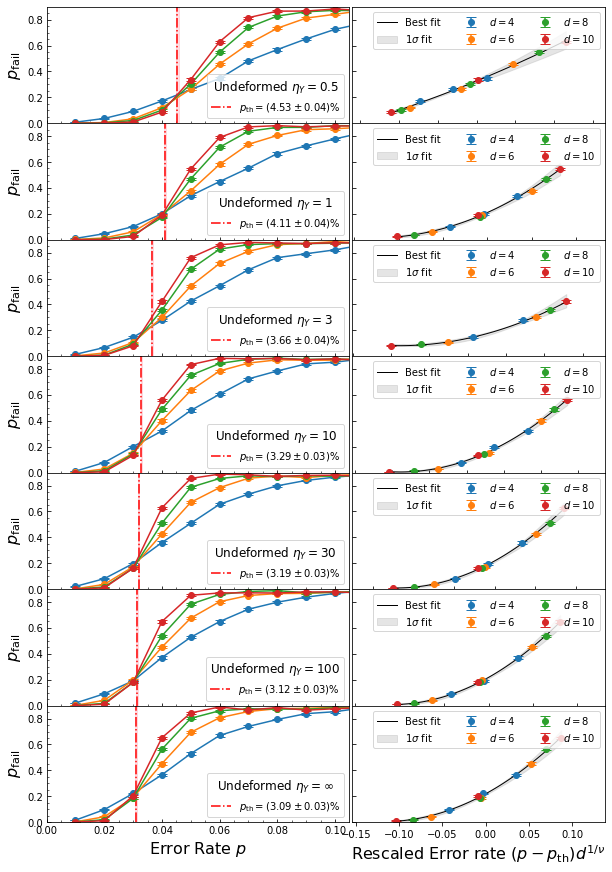

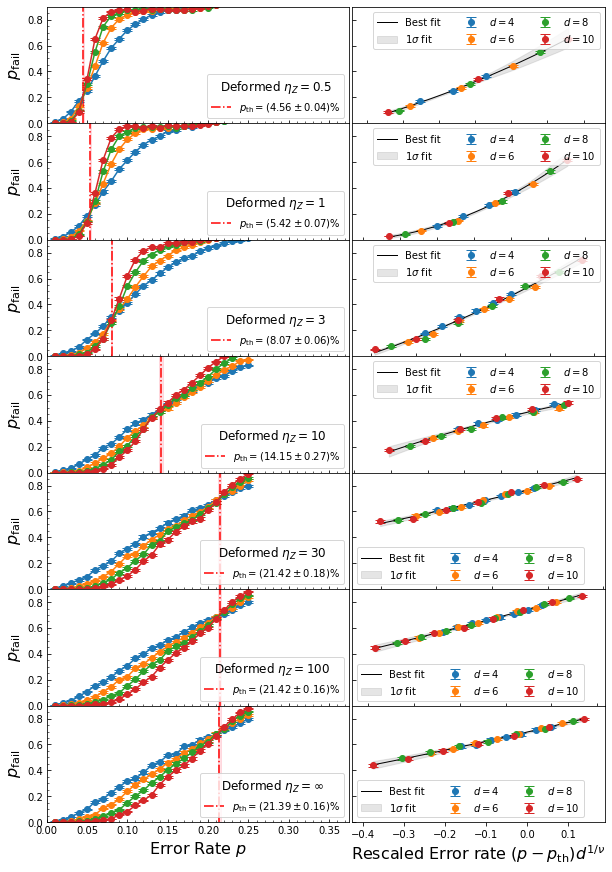

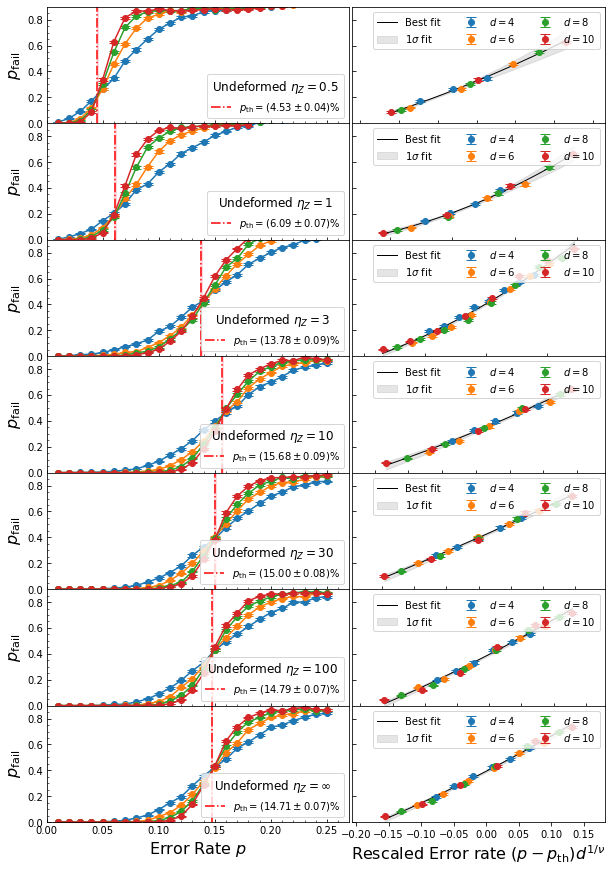

In [11]:
for bias_direction, deformed in itertools.product(
    ['x', 'y', 'z'], [True, False]
):
    plot_crossing_collapse(
        plt, bias_direction, deformed, results_df,
        thresholds_df, trunc_results_df, params_bs_list,
        pdf=pdf(f'crosscollapse{def_map[deformed]}{bias_direction}')
    )

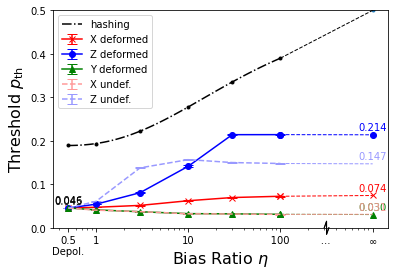

In [12]:
plot_combined_threshold_vs_bias(plt, Line2D, thresholds_df, pdf=pdf('combinedthresh'))

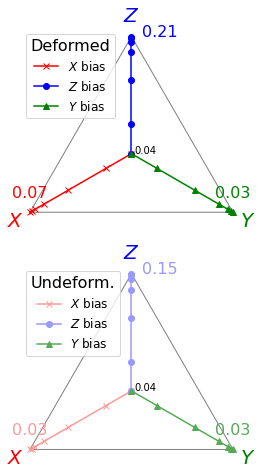

In [13]:
plot_combined_triangles(plt, thresholds_df, pdf=pdf('threshtriangles'))

In [14]:
len(params_bs_list)

38

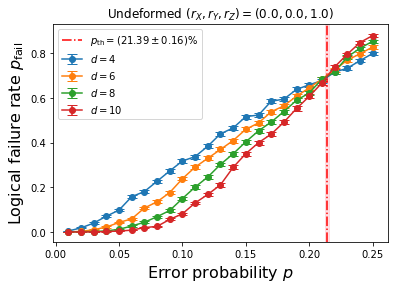

In [15]:
plot_crossing_example(plt, results_df, thresholds_df, params_bs_list, pdf=pdf('egcross'))

         value        se
p_th  0.213857  0.001618
nu    1.071832  0.068134
A     0.695697  0.007408
B     0.728417  0.087677
C     0.141129  0.096367


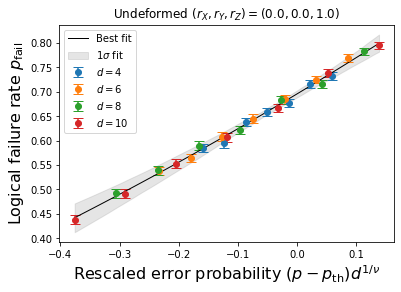

In [16]:
plot_collapse_example(plt, thresholds_df, trunc_results_df, params_bs_list, pdf=pdf('egcollapse'))

In [17]:
_ = export_summary_tables(thresholds_df, table_dir=table_dir, verbose=False)